### Introduction 

With more than 9 million calls handled each year, the New York City 911 system is one of the most important and active emergency response systems in the country. This unmatched volume emphasizes how crucial coordination and efficiency are to guaranteeing prompt emergency responses. The emergency response services, including EMS (Emergency Medical Services), FDNY (Fire Department of New York), and NYPD (New York Police Department), play a critical role in ensuring public safety and mitigating the impact of incidents ranging from medical emergencies to structural fires and other crises. An effective and efficient response is crucial in saving lives and minimizing harm. However, response times across different agencies and incident types often vary due to factors such as resource allocation, operational inefficiencies, and logistical challenges.
The dataset provided captures various performance metrics, including average travel times, dispatch times, and cumulative arrival times, for multiple emergency services across incident types. This rich dataset presents an opportunity to analyze and identify key patterns in response times and develop strategies to optimize these critical metrics. By examining these data points, this research aims to improve emergency response efficiency, ultimately enhancing public safety outcomes.


## Business Problem

Despite the vital importance of swift emergency response, inconsistencies in response times among EMS, FDNY, and NYPD indicate potential inefficiencies in the current system. Factors such as the nature of the incident, call to dispatch rates and travel durations may hinder the ability of emergency agencies to respond effectively to incidents. For instance, the data highlights significant variations in response metrics for life-threatening medical emergencies compared to non-critical incidents, as well as discrepancies across agencies for similar types of emergencies.
These inefficiencies may stem from resource constraints, poor coordination between agencies, or logistical bottlenecks. Without a comprehensive analysis and optimization of response workflows, these delays may persist, resulting in suboptimal outcomes for emergency incidents. Addressing these inefficiencies is critical for improving the timeliness and effectiveness of emergency responses.

## Data and Scope

The 911 End-to-End Data dataset, provided by the City of New York Mayor's Office of Operations, encompasses 10,508 reported incidents from November 2013 to November 2024. It offers comprehensive details on emergency call incidents and response times. The dataset includes 30 variables, spanning quantitative, continuous, and categorical predictors that capture critical characteristics of each incident. The data is collected on a week-on-week basis for each agency and final incident type and updated monthly. 
The primary outcome variable, "Response Time - Call to Agency Arrival," is a quantitative measure representing the time it takes for emergency services (police, fire, or medical) to arrive at the scene after receiving a call.
Datasource:https://catalog.data.gov/dataset/911-end-to-end-data 

Importing Dataset 

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print(pd.__version__)

2.1.4


In [70]:
# Fixing the issue by correcting the file path to the available file
# Datafile location
infile="911_End-to-End_Data (3).csv"

df = pd.read_csv(infile)

# Display the first few records to verify data loaded successfully
df.head()

,Week Start Date,Responding Agency,Incident Type,Number of Incidents,Average Call to Pickup Time,Dispatch Time,Response Time,Call to First Pickup,Call to PD Calltaker Handoff,Call to FDNY Pickup,...,Median Travel,Median Cumulative First Arrival (Multi-Agency Incidents),Average Travel,Average Dispatch,Average EMS Processing,Average EMS Pickup,Average Calltaker Processing,Average Pickup,Average FD Pickup,Average FD Processing
0,11/25/24,NYPD (Non-CIP),Police Officer/Security Holding Suspect,137,65.73,395.95,1088.42,6.52,124.93,NaN,...,683.0,1087.0,18.14,5.61,NaN,NaN,1.97,0.11,NaN,NaN
1,11/25/24,NYPD (Non-CIP),Disorderly Person/Group/Noise,1540,81.16,612.41,2651.49,4.90,157.42,NaN,...,1294.5,1889.5,44.19,8.94,NaN,NaN,2.54,0.08,NaN,NaN
2,11/25/24,NYPD (Non-CIP),Past Crime,3367,104.68,905.30,4881.09,5.29,204.06,NaN,...,2510.0,3330.0,81.35,13.43,NaN,NaN,3.31,0.09,NaN,NaN
3,11/25/24,FDNY,2. Non-Structural Fires,101,16.06,83.86,266.36,4.76,27.36,32.36,...,246.0,340.0,4.44,0.17,NaN,NaN,0.38,0.08,0.08,0.96
4,11/25/24,FDNY,3. Medical Emergencies,3088,115.89,174.44,340.40,5.15,260.84,NaN,...,321.0,466.0,5.67,0.49,2.17,0.08,4.26,0.09,NaN,NaN


In [92]:
#Checking number of rows # Calculate and print the number of rows in the dataset
num_rows = df.shape[0]
print(f"The dataset contains {num_rows} rows.")

The dataset contains 10508 rows.


In [81]:
df.head()

,Week Start Date,Responding Agency,Incident Type,Number of Incidents,Average Call to Pickup Time,Dispatch Time,Response Time,Call to First Pickup,Call to PD Calltaker Handoff,Call to FDNY Pickup,...,Median Travel,Median Cumulative First Arrival (Multi-Agency Incidents),Average Travel,Average Dispatch,Average EMS Processing,Average EMS Pickup,Average Calltaker Processing,Average Pickup,Average FD Pickup,Average FD Processing
0,11/25/24,NYPD (Non-CIP),Police Officer/Security Holding Suspect,137,65.73,395.95,1088.42,6.52,124.93,NaN,...,683.0,1087.0,18.14,5.61,NaN,NaN,1.97,0.11,NaN,NaN
1,11/25/24,NYPD (Non-CIP),Disorderly Person/Group/Noise,1540,81.16,612.41,2651.49,4.90,157.42,NaN,...,1294.5,1889.5,44.19,8.94,NaN,NaN,2.54,0.08,NaN,NaN
2,11/25/24,NYPD (Non-CIP),Past Crime,3367,104.68,905.30,4881.09,5.29,204.06,NaN,...,2510.0,3330.0,81.35,13.43,NaN,NaN,3.31,0.09,NaN,NaN
3,11/25/24,FDNY,2. Non-Structural Fires,101,16.06,83.86,266.36,4.76,27.36,32.36,...,246.0,340.0,4.44,0.17,NaN,NaN,0.38,0.08,0.08,0.96
4,11/25/24,FDNY,3. Medical Emergencies,3088,115.89,174.44,340.40,5.15,260.84,NaN,...,321.0,466.0,5.67,0.49,2.17,0.08,4.26,0.09,NaN,NaN


In [93]:
from IPython.display import display, HTML

table_html = '<table style="border-collapse: collapse;"><tr><th>Column Name</th><th>Data Type</th><th>Value Count</th><th>Null Count</th></tr>'
for col in df.columns:
    dtype = df[col].dtype
    value_count = df[col].value_counts().shape[0]
    null_count = df[col].isnull().sum()
    table_html += f'<tr><td style="border: 1px solid black; padding: 5px;">{col}</td><td style="border: 1px solid black; padding: 5px;">{dtype}</td><td style="border: 1px solid black; padding: 5px;">{value_count}</td><td style="border: 1px solid black; padding: 5px;">{null_count}</td></tr>'
table_html += '</table>'

display(HTML(table_html))

Column Name,Data Type,Value Count,Null Count
Week Start Date,object,576,0
Responding Agency,object,4,0
Incident Type,object,22,0
Number of Incidents,int64,5156,0
Average Call to Pickup Time,float64,5736,0
Dispatch Time,float64,9676,0
Response Time,float64,10060,0
Call to First Pickup,float64,600,0
Call to PD Calltaker Handoff,float64,7694,0
Call to FDNY Pickup,float64,804,9461


In [83]:
# Filter out rows where 'AgencyCallPickup' is NA
df = df[df['Incident Type'].notna()]

In [74]:
#Selecting only the key variables
EMS = df[['Responding Agency', 'Incident Type', 'Number of Incidents', 
                'Average Call to Pickup Time', 'Dispatch Time', 'Response Time']]

In [75]:
EMS.head()

,Responding Agency,Incident Type,Number of Incidents,Average Call to Pickup Time,Dispatch Time,Response Time
0,NYPD (Non-CIP),Police Officer/Security Holding Suspect,137,65.73,395.95,1088.42
1,NYPD (Non-CIP),Disorderly Person/Group/Noise,1540,81.16,612.41,2651.49
2,NYPD (Non-CIP),Past Crime,3367,104.68,905.30,4881.09
3,FDNY,2. Non-Structural Fires,101,16.06,83.86,266.36
4,FDNY,3. Medical Emergencies,3088,115.89,174.44,340.40


In [76]:
#Converting time columns to minutes from seconds
time_columns = ['Average Call to Pickup Time', 'Dispatch Time', 'Response Time']

# Convert the columns from seconds to minutes and round to 2 decimal places using .loc
for col in time_columns:
    EMS.loc[:, col] = (EMS[col] / 60).round(2)  # Use .loc to explicitly set the values



In [77]:
EMS.head()

,Responding Agency,Incident Type,Number of Incidents,Average Call to Pickup Time,Dispatch Time,Response Time
0,NYPD (Non-CIP),Police Officer/Security Holding Suspect,137,1.10,6.60,18.14
1,NYPD (Non-CIP),Disorderly Person/Group/Noise,1540,1.35,10.21,44.19
2,NYPD (Non-CIP),Past Crime,3367,1.74,15.09,81.35
3,FDNY,2. Non-Structural Fires,101,0.27,1.40,4.44
4,FDNY,3. Medical Emergencies,3088,1.93,2.91,5.67


In [78]:
import pandas as pd
# Count NA in EMS Data
total_na = EMS.isna().sum().sum()
print(f"Total missing values: {total_na}")

Total missing values: 0


In [79]:
category_mapping = {
    '2. Non-Structural Fires': 'Fires',
    '1. Critical': 'Medical Emergencies',
    'Dispute': 'Dispute',
    'Other Crimes (In Progress)': 'Crime',
    '3. Non-Critical': 'Medical Emergencies',
    '3. Medical Emergencies': 'Medical Emergencies',
    '2. Serious': 'Medical Emergencies',
    '1. Life Threating Med Emergencies': 'Medical Emergencies',
    'Possible Crimes': 'Crime',
    'Past Crime': 'Crime',
    'Alarms': 'Non-Medical Emergencies',
    '1. Structural Fires': 'Fires',
    '2. Non-Life Threatening Med Emergencies': 'Medical Emergencies',
    '4. Non-Medical Emergencies': 'Non-Medical Emergencies',
    'Police Officer/Security Holding Suspect': 'Crime',
    'Investigate/Possible Crime': 'Crime',
    'Disorderly Person/Group/Noise': 'Dispute',
    'Vehicle Accident': 'Vehicle Accident',
    'Hazardous Materials/Suspicious Letters/Packages/Substances/Substances': 'Non-Medical Emergencies',
    'Shot Spotter': 'Crime',
    'United States Postal Service - Bio Hazard Detection System': 'Non-Medical Emergencies'
}

# Default category for unmapped values
default_category = 'Unknown'

# Use .loc[] for modifying the DataFrame
EMS.loc[:, 'Incident Type'] = EMS['Incident Type'].map(category_mapping).fillna(default_category)

# Create dummy variables
incident_dummies = pd.get_dummies(EMS['Incident Type'], prefix='Category')

# Optionally, merge the dummies with the original DataFrame
EMS = pd.concat([EMS, incident_dummies], axis=1)

In [80]:
#Displaying the Final Incident Type Categories
EMS['Incident Type'].unique()

array(['Crime', 'Dispute', 'Fires', 'Medical Emergencies',
       'Non-Medical Emergencies', 'Vehicle Accident', 'Unknown'],
      dtype=object)

## Research Methodology 

To examine and extract insights from the 911 emergency response dataset, the research methodology used in this study was a systematic approach that included descriptive statistics, data pre-processing, and both supervised and unsupervised machine learning approaches. An outline of each phase is provided below:

1. Data Cleaning and Preprocessing
Identifying key variables based on domain expertise was an imperative foundation to our data cleaning approach, focusing on variables of significant relevance to the analysis.
•	Agency (Categorical): Refers to the emergency response agency, such as FDNY or NYPD, that handles the incident.
•	Final Incident Type (Categorical): Represents the category of the emergency, such as critical, life-threatening medical emergencies, or non-critical situations.
•	Number of Incidents Calculated: This variable discrete and they Indicates the total number of incidents recorded per week.
•	Call to First Pickup: This is a continuous variable that measures the time from when the call is initiated to the first pickup. This is a critical metric as it reflects the initial response time of the first responding unit.
•	Call to PD Call Taker Handoff: This is a continuous data which measures the duration from when the call enters the phone system until the PCT connects with the next agency.
•	Call to FDNY Pickup: This is a continuous variable that measures the duration from when the call enters the phone system until the ARD (in FD) picks up.
•	Call to EMS Pickup: This is a continuous variable that measures the duration from when the call enters the phone system until the ARD (in EMS) picks up.
•	Call to Agency Dispatch: Measures the duration from when the call enters the phone system until a unit is assigned
•	Call to Agency Arrival: Measures the duration from when the call enters the phone system until a unit arrives on-scene
The data cleaning process focused on preparing the 911 emergency response dataset for analysis by addressing missing values, reducing redundancy, and improving interpretability. Key steps included
1.	Combining Similar Columns: The dataset revealed similarities between Call to First Pickup, Call to PD Call taker Handoff, Call to FDNY Pickup, and Call to EMS Pickup. However, Call to FDNY Pickup and Call to EMS Pickup had significantly more missing values. To address this, these variables were combined into a single metric, Average Call to Pick up Time.
2.	Proxy Variables: Proxy variables (Response Time and Dispatch Time) were introduced to respectively replace features such as Call to Agency Arrival and Call to Agency Dispatch to mitigate multicollinearity, as these metrics were derivatives of other variables like Call to Pick up. 
3.	Managing Extreme Outliers: Since infinitely huge values were extreme outliers that would have seriously skewed the analysis, they were substituted with the respective means. These were probably abnormalities in the recording process or mistakes in data entry.
4.	Important Variable Selection and Renaming: To increase interpretability and relevance for analysis, important predictors related to emergency response times were carefully chosen and renamed from among the dataset's thirty variables. This simplified the study's focus and cut down on noise.
5.	Removing Missing Values (NAs): To keep the dataset consistent and comprehensive for precise modeling, any rows with missing values in important variables were eliminated. Fortunately, no missing values were identified. 
6.	Correcting Negative Values: Since time cannot rationally be changed, 8 negative values in time-related variables which were probably a mistake in data entry, including response time or travel times, were changed to their absolute values.
7.	Mapping the Final Incident Types into Broader Categories: The dataset divided Final Incident type into 22 distinct categories. To facilitate analysis and enhance insights, these were categorized into seven more general groups. Among the seven categories were:
•	Medical Emergencies
•	Crime
•	Non-Medical Emergencies 
•	Disputes
•	Vehicles Accidents
•	Fires 
•	Unknown (For any Incident types that were not classified)

8.	Dummy Coding Categorical Variables: To enable numerical analysis, categorical variables like Agency (FDNY, NYPD, EMS) and Final Incident Type were dummy-coded. To enable insightful comparisons, several reference groups were also re-leveled. For example, the reference groups for each variable were NYPD (Non-CPID) and Dispute.
9.	Converting Time Variables: To improve interpretability and align with real-world applications, time variables that were originally recorded in seconds were converted to minutes. Finally, all variables were renamed to ensure clarity and readability.

To convert the raw dataset into a structured format appropriate for modeling and analysis, these preprocessing processes were essential. Additionally, they made sure that the final data set was free from mistakes and inconsistencies and appropriately represented the underlying trends in emergency response data.

2. Descriptive Statistics 
To describe and comprehend the main features of the data, descriptive statistical techniques were used. This comprised frequency distributions for categorical variables (like incident kinds and responding agencies) and measures of central tendency and variability for continuous variables (like median response times). The dataset was initially understood thanks to these descriptions, which also influenced later modeling techniques.

3. Unsupervised Machine Learning
To find hidden patterns and structures in the data, unsupervised learning approaches were used. Similar incidents were grouped according to their characteristics, like incident kind and reaction time, using K-Means Clustering. This aided in finding similarities among various emergency types and directed methods for allocating resources.

4. Supervised Machine Learning 
Model Specification:

Approaches to supervised learning were used to forecast response times and assess the variables affecting them. The main methods used were as follows:
Establishing baseline models for response time prediction based on specific factors, such as agency type and typical trip time, is done using linear regression.
Lasso and Ridge Regression: To improve model interpretability and handle multicollinearity, these regularized models were used.

Stepwise Forward Modelling: to try and intrinsically select the most appropriate variables. 


### Analysis

### Descriptive Statistics

The dataset reveals that in fig. 2 medical emergencies dominate incident frequency, significantly outpacing other categories such as crimes, disputes, and non-medical emergencies. Despite the high volume of medical and crime-related incidents, the average call-to-pickup time remains consistent at 1.23 minutes, with minimal variation, indicating efficiency in initial responses. Dispatch and response times on Table 1 show considerable variability, with mean response times of 20.02 minutes and a maximum of 243.18 minutes, suggesting delays in specific cases, potentially influenced by less frequent but complex incidents like vehicle accidents and fires.  According to NYC.gov, fire incidents in New York City are relatively less common compared to other emergencies, such as medical calls. For instance, in April 2019, the FDNY responded to 2,155 fire incidents, whereas medical emergencies numbered 17,545. This disparity is largely due to effective fire prevention measures, including strict building codes, regular inspections, public education, and rapid response capabilities. However, it's important to note that while fire incidents are less frequent, they still pose significant risks and require continuous vigilance.
In fig.1 (Histogram) The distribution of response time is highly skewed to the right, indicating that the dependent variable is not normally distributed. This skewness can be attributed to the heavy concentration of shorter response time. Most incidents are resolved efficiently, with response times predominantly under 50 minutes, reflecting prompt action by emergency services. However, the presence of extreme delays, with some cases reaching up to 16,000 seconds (approximately 4.4 hours), suggests occasional inefficiencies. These outliers may result from logistical challenges or complex scenarios, emphasizing the need for targeted interventions to enhance system performance.


In [85]:
# Make all numeric values absolute (Removing 8 negative values were identified across the dataset)
numeric_cols = EMS.select_dtypes(include=['number']).abs()

# Generate descriptive statistics for numeric columns
descriptive_stats = numeric_cols.describe(percentiles=[0.5]).T

# Add the count (n) and median explicitly
descriptive_stats['n'] = numeric_cols.count()
descriptive_stats['median'] = numeric_cols.median()

# Select and reorder the desired statistics
descriptive_stats = descriptive_stats[['n', 'mean', 'std', 'min', 'median', 'max']]

# Round the values to 2 decimal places
descriptive_stats = descriptive_stats.round(2)

# Print the table with a title
print("Table 1. Descriptive Statistics")
print(descriptive_stats)

Table 1. Descriptive Statistics
                                 n     mean      std   min   median       max
Number of Incidents          10508  3142.06  3338.47  1.00  2409.00  17613.00
Average Call to Pickup Time  10508     1.23     0.44  0.07     1.28     12.19
Dispatch Time                10508     7.09     5.66  0.28     5.33     71.32
Response Time                10508    20.02    18.91  0.02    11.31    243.18


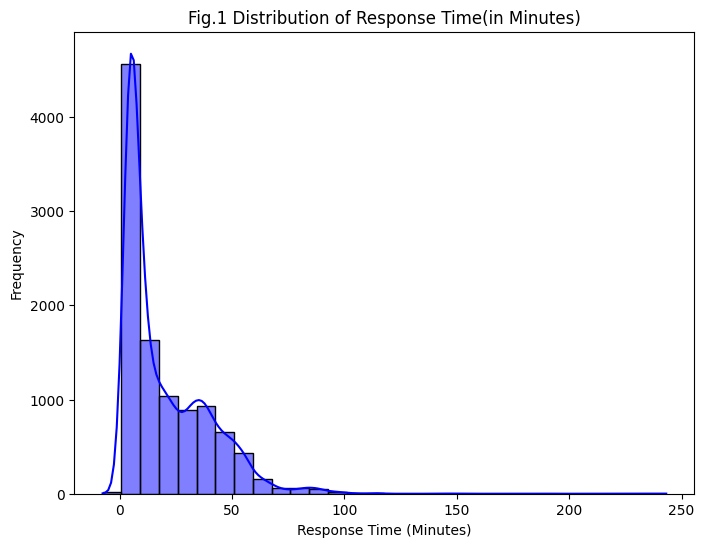

In [86]:

import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for Response Time
plt.figure(figsize=(8, 6))
sns.histplot(EMS['Response Time'], bins=30, kde=True, color='blue')
plt.title('Fig.1 Distribution of Response Time(in Minutes)')
plt.xlabel('Response Time (Minutes)')
plt.ylabel('Frequency')
plt.show()

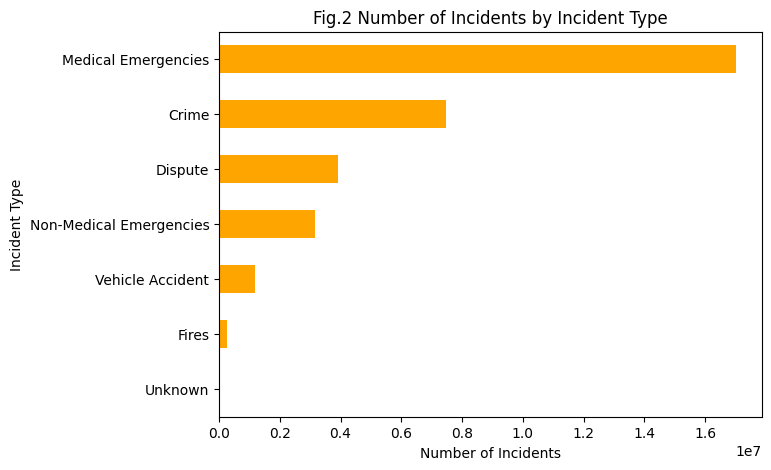

In [87]:
# Bar chart for Number of Incidents by Incident Type (horizontal)
incident_counts = EMS.groupby('Incident Type')['Number of Incidents'].sum().sort_values()

plt.figure(figsize=(7, 5))
incident_counts.plot(kind='barh', color='orange')
plt.title('Fig.2 Number of Incidents by Incident Type')
plt.xlabel('Number of Incidents')
plt.ylabel('Incident Type')
plt.show()

The boxplot in fig. 3 illustrates the distribution of response times across different emergency response agencies, highlighting distinct patterns. NYPD (non-CIP) exhibits the highest median response time and significant variability, with numerous outliers extending well beyond 100 minutes, suggesting potential inefficiencies or complexities in handling certain incidents. FDNY, NYPD, and EMS have much lower median response times, indicating quicker responses in their respective domains. However, each agency also displays a few outliers, albeit less pronounced compared to NYPD (Non-CIP), reflecting occasional delays in operations. These variations underscore the need for targeted strategies to address delays in NYPD (Non-CIP) responses while maintaining the efficiency observed in other agencies

/tmp/ipykernel_82/317632473.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=EMS, x='Responding Agency', y='Response Time', palette='Set2')


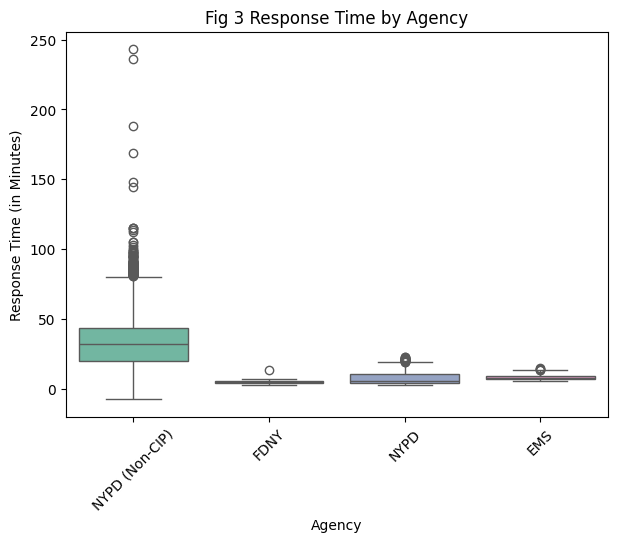

In [88]:
# Boxplot for Response Time by Agent
plt.figure(figsize=(7, 5))
sns.boxplot(data=EMS, x='Responding Agency', y='Response Time', palette='Set2')
plt.title('Fig 3 Response Time by Agency')
plt.xlabel('Agency')
plt.ylabel('Response Time (in Minutes)')
plt.xticks(rotation=45)
plt.show()

Fig.4 illustrates response time distributions across various incident types. Crimes exhibit the highest variability and median response times, with numerous outliers exceeding 100 minutes, suggesting complexities or delays in handling such cases. Disputes also have relatively high response times, though less variability compared to crimes. Medical Emergencies and Fires show the quickest response times, with low medians and minimal variability, reflecting the prioritization of these critical incidents.  Non-Medical Emergencies and Vehicle Accidents have moderate response times, with some outliers indicating occasional delays. The Unknown category has negligible variability, likely due to limited or consistent handling practices. 

/tmp/ipykernel_82/2902680756.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=EMS, x='Incident Type', y='Response Time', palette='Set2')


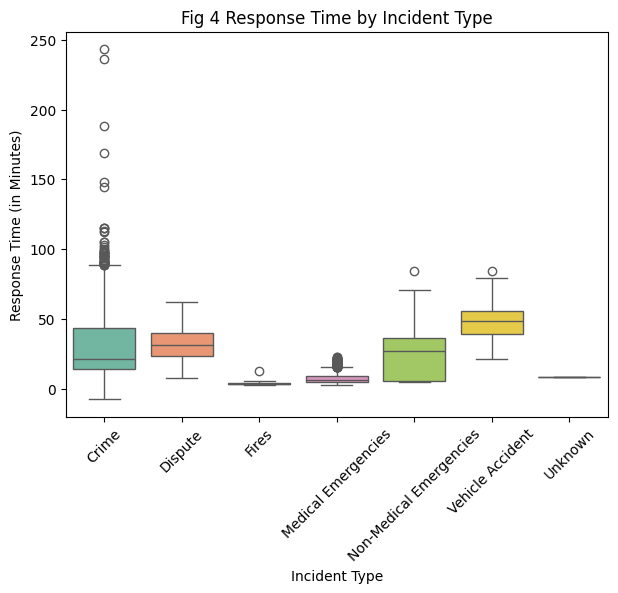

In [94]:
# Boxplot for Response Time by Agent
plt.figure(figsize=(7, 5))
sns.boxplot(data=EMS, x='Incident Type', y='Response Time', palette='Set2')
plt.title('Fig 4 Response Time by Incident Type')
plt.xlabel('Incident Type')
plt.ylabel('Response Time (in Minutes)')
plt.xticks(rotation=45)
plt.show()

The scatterplot in fig.5 depicts the relationship between the number of incidents and response time across agencies, with data reported on a weekly basis from 2013 to 2024. NYPD (non-CIP) shows moderate incident volumes compared to EMS, yet it consistently attends incidents weekly throughout the time. This pattern suggests that non-CIP cases may involve frequent but smaller-scale or localized incidents, contributing to the spread observed in response times, which includes significant outliers exceeding 100 minutes. In contrast, EMS handles a significantly higher volume of incidents but maintains lower and more consistent response times, highlighting its efficiency despite high demand. FDNY and NYPD exhibit a similar pattern of low response times with fewer incidents, likely reflecting the nature of fire and critical police emergencies that require prompt but less frequent responses. 

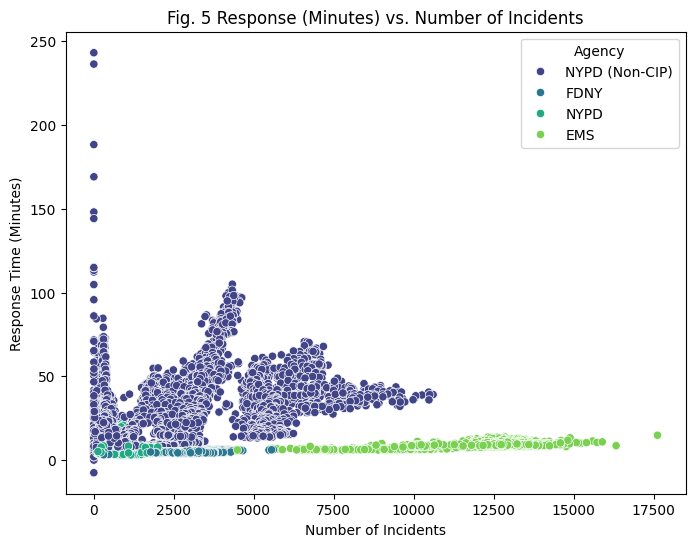

In [97]:
# Scatter plot: Response Time vs. Number of Incidents
plt.figure(figsize=(8, 6))
sns.scatterplot(data=EMS, x='Number of Incidents', y='Response Time', hue='Responding Agency', palette='viridis')
plt.title('Fig. 5 Response (Minutes) vs. Number of Incidents')
plt.xlabel('Number of Incidents')
plt.ylabel('Response Time (Minutes)')
plt.legend(title='Agency')
plt.show()

NYPD (non-CIP) -Fig.6- shows a wide distribution of response times, with several outliers exceeding 100 minutes, even for shorter call-to-pickup times. This indicates that while pickup times are generally consistent, subsequent delays in response may arise. Conversely, EMS, FDNY, and NYPD maintain relatively low and stable response times across all average call-to-pickup times, reflecting operational efficiency The consistent clustering of these agencies at lower response times highlights their ability to transition quickly from pickup to on-scene arrival. 

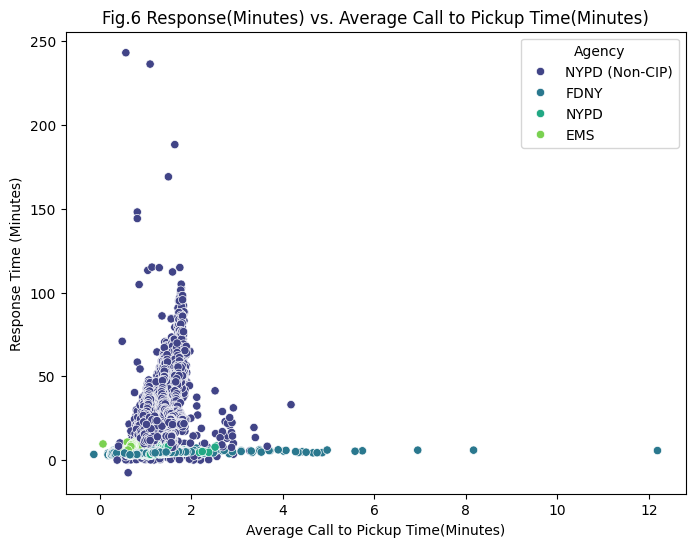

In [98]:
# Scatter plot: Response Time vs. Median Travel
plt.figure(figsize=(8, 6))
sns.scatterplot(data=EMS, x='Average Call to Pickup Time', y='Response Time', hue='Responding Agency', palette='viridis')
plt.title('Fig.6 Response(Minutes) vs. Average Call to Pickup Time(Minutes)')
plt.xlabel('Average Call to Pickup Time(Minutes)')
plt.ylabel('Response Time (Minutes)')
plt.legend(title='Agency')
plt.show()

## Unsupervised Machine Learning 

KMeans Cluster: This approach was explored to determine the natural similarities between the numeric variables. The table below presents the centroids of clusters based on key performance metrics: Number of Incidents, Average Call to Pick up Time, Dispatch Time, and Response Time.

Scaling the data to enable Kmeans clustering operations

In [99]:
# Select numeric columns
numeric_cols = EMS.select_dtypes(include=['number'])

# Scale numeric columns
EMS_scaled = numeric_cols.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Combine scaled numeric columns with non-numeric columns if needed
non_numeric_cols = EMS.select_dtypes(exclude=['number'])
EMS_scaled = pd.concat([EMS_scaled, non_numeric_cols], axis=1)

# Display the scaled DataFrame
EMS_scaled

,Number of Incidents,Average Call to Pickup Time,Dispatch Time,Response Time,Responding Agency,Incident Type,Category_Crime,Category_Dispute,Category_Fires,Category_Medical Emergencies,Category_Non-Medical Emergencies,Category_Unknown,Category_Vehicle Accident
0,0.007722,0.099838,0.195025,0.102389,NYPD (Non-CIP),Crime,True,False,False,False,False,False,False
1,0.087384,0.120130,0.239925,0.206294,NYPD (Non-CIP),Dispute,False,True,False,False,False,False,False
2,0.191120,0.151786,0.300622,0.354513,NYPD (Non-CIP),Crime,True,False,False,False,False,False,False
3,0.005678,0.032468,0.130348,0.047744,FDNY,Fires,False,False,True,False,False,False,False
4,0.175278,0.167208,0.149129,0.052650,FDNY,Medical Emergencies,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10573,0.025948,0.245942,0.353109,0.087352,NYPD (Non-CIP),Dispute,False,True,False,False,False,False,False
10574,0.017318,0.064123,0.123259,0.042759,FDNY,Fires,False,False,True,False,False,False,False
10575,0.013002,0.215097,0.197512,0.060907,NYPD,Medical Emergencies,False,False,False,True,False,False,False
10576,0.012605,0.203734,0.172264,0.048662,NYPD,Medical Emergencies,False,False,False,True,False,False,False


In [100]:

from sklearn.cluster import KMeans

#Select only numeric columns for clustering
# Ensure no categorical or non-numeric data is used
numeric_cols = EMS_scaled.select_dtypes(include=['number'])

# Perform KMeans clustering
# Initialize KMeans with the desired number of clusters and a fixed random state
kmeans = KMeans(n_clusters=4, random_state=42)  # n_clusters = 4 for four clusters

# Fit the KMeans model to the numeric data
clustered_EMS_kmeans = kmeans.fit(numeric_cols)

# Assign cluster labels to the DataFrame
# Add a new column 'Cluster' to store cluster labels
EMS_scaled['Cluster'] = clustered_EMS_kmeans.labels_

#Check the data types and filter for numeric columns only
# Ensure that only numeric columns are considered for the summary
numeric_columns = EMS_scaled.select_dtypes(include=['number']).columns

#Group data by clusters and calculate the mean only for numeric columns
cluster_summary = EMS_scaled.groupby('Cluster')[numeric_columns].mean()

# Print the cluster summary to check the mean values for each numeric feature per cluster
print("Cluster Summary:")
print(cluster_summary)

# Step 6: Optional - View the first few rows of the DataFrame with cluster labels
print(EMS_scaled.head())

# Calculate and display centroids of the clusters
# Centroids are stored in the `cluster_centers_` attribute of the fitted KMeans model
centroids = kmeans.cluster_centers_

# Convert centroids to a DataFrame for better readability, using the original numeric column names
import pandas as pd
centroids_df = pd.DataFrame(centroids, columns=numeric_cols.columns)
print("\nCluster Centroids:")
print(centroids_df)

Cluster Summary:
         Number of Incidents  Average Call to Pickup Time  Dispatch Time  \
Cluster                                                                    
0                   0.158201                     0.121868       0.163141   
1                   0.612953                     0.090888       0.160338   
2                   0.222069                     0.130154       0.292661   
3                   0.030520                     0.097374       0.177174   

         Response Time  Cluster  
Cluster                          
0             0.061860      0.0  
1             0.074385      1.0  
2             0.202970      2.0  
3             0.089478      3.0  
   Number of Incidents  Average Call to Pickup Time  Dispatch Time  \
0             0.007722                     0.099838       0.195025   
1             0.087384                     0.120130       0.239925   
2             0.191120                     0.151786       0.300622   
3             0.005678                    

Analysis of KMeans Cluster Centriod

Cluster 0 represents scenarios with the lowest average values across all metrics, indicating incidents with minimal delays and rapid resolutions. This cluster likely reflects well-managed, low-complexity emergencies. 

Cluster 1 exhibits slightly higher values for all metrics, particularly Dispatch Time and Response Time, suggesting a group of incidents that faced moderate delays in dispatching units and reaching the scene. 

Cluster 2 has the highest value for Number of Incidents but maintains relatively low Call to Pick up Time and Response Time, showcasing efficiency in managing high-volume incidents. This may represent emergencies requiring streamlined processes for quick resolution.

Cluster 3 shows elevated Dispatch Time and Response Time, indicating a group of incidents with operational inefficiencies or external factors causing significant delays. 

## Supervised Machine Learning 

The cross-validation technique split the data into an 80% training set and a 20% test set to evaluate model robustness and predictive accuracy, ensuring an accurate Root Mean Square Error (RMSE). We utilized Multiple Regression (Ordinary Least Squares), LASSO, Ridge, and Elastic Net to identify the model with the best RMSE. These methods reveal the bias-variance trade-off, as LASSO drops variables and Ridge reduces coefficients.

After establishing that OLS model was the best model based on the ideal lowest RMSE of 11.07 minutes. We proceeded to employ a stepwise regression model to try and establish which factors would be best to have in a model predicting response time by adding one at a time. Our Stepwise regression model reviewed that all variables were statistically significant in determining the response time and subsequently had a lower value of RMSE and highest R-Squared value meaning the model is able to explain most of the variations. Subsequently, Stepwise model emerged as the best model for predicting response time in New York City. 


In [101]:
from sklearn.model_selection import train_test_split


# Display basic info about the dataset
print(EMS.info())

# Define features (X) and target (y)
X = EMS.drop(columns=['Response Time'])  # Features
y = EMS['Response Time']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)


<class 'pandas.core.frame.DataFrame'>
Index: 10508 entries, 0 to 10577
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Responding Agency                 10508 non-null  object 
 1   Incident Type                     10508 non-null  object 
 2   Number of Incidents               10508 non-null  int64  
 3   Average Call to Pickup Time       10508 non-null  float64
 4   Dispatch Time                     10508 non-null  float64
 5   Response Time                     10508 non-null  float64
 6   Category_Crime                    10508 non-null  bool   
 7   Category_Dispute                  10508 non-null  bool   
 8   Category_Fires                    10508 non-null  bool   
 9   Category_Medical Emergencies      10508 non-null  bool   
 10  Category_Non-Medical Emergencies  10508 non-null  bool   
 11  Category_Unknown                  10508 non-null  bool   
 12  Category_

In [102]:
print(EMS.dtypes)

Responding Agency                    object
Incident Type                        object
Number of Incidents                   int64
Average Call to Pickup Time         float64
Dispatch Time                       float64
Response Time                       float64
Category_Crime                         bool
Category_Dispute                       bool
Category_Fires                         bool
Category_Medical Emergencies           bool
Category_Non-Medical Emergencies       bool
Category_Unknown                       bool
Category_Vehicle Accident              bool
dtype: object


### OLS Regression

In [103]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

# Define response variable
y = EMS["Response Time"]

# Define predictor variables
x = EMS[['Responding Agency', 'Incident Type', 'Average Call to Pickup Time','Number of Incidents', 'Dispatch Time']]

# Create dummy variables for categorical columns and convert them to integers
categorical_columns = ['Responding Agency', 'Incident Type']
x = pd.get_dummies(x, columns=categorical_columns, drop_first=True).astype(int)

# Ensure response variable is numeric
y = pd.to_numeric(y, errors='coerce')

# Drop rows with missing values
data = pd.concat([x, y.rename("Response Time")], axis=1).dropna()

# Separate predictors (x) and response (y)
x = data.drop(columns=["Response Time"])
y = data["Response Time"]

# Add constant to predictors
x = sm.add_constant(x)

# Fit the linear regression model
model = sm.OLS(y, x).fit()

# View model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Response Time   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     1678.
Date:                Thu, 12 Dec 2024   Prob (F-statistic):               0.00
Time:                        18:41:38   Log-Likelihood:                -40174.
No. Observations:               10508   AIC:                         8.037e+04
Df Residuals:                   10495   BIC:                         8.047e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

From the OLS results, we observed that a minute increase in dispatch time is an increase in response time by an average of 1.53minutes, all this being equal. Hence, depicting a positive relationship between minutes between calls and pickup and response time. Also, the number of incidents to response time shows a positive relationship, although, with minimal impact, with an increase of 0.0012 minutes per additional incident. However, response time for Dispute takes 2.8 minutes less compared to crime while response times for medical emergencies are 6 minutes longer than crime incidents. NYPD (non-CIP) takes 27 minutes more to respond to an incident.

In [105]:
# Add constant to predictors again to match the fitted model
x = sm.add_constant(x)

# Fit the linear regression model
model = sm.OLS(y, x).fit()

# Predict values using the model
y_pred = model.predict(x)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(np.mean((y - y_pred)**2))

# Calculate R-squared
r_squared = model.rsquared

# Output both RMSE and R-squared
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared: {r_squared:.4f}")

Root Mean Squared Error (RMSE): 10.9546
R-squared: 0.6645


### Stepwise Forward Regression 

In [115]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Create dummy variables for categorical columns
categorical_columns = ['Responding Agency', 'Incident Type']
x = pd.get_dummies(EMS[['Responding Agency', 'Incident Type', 'Average Call to Pickup Time',
                        'Number of Incidents', 'Dispatch Time']],
                   columns=categorical_columns, drop_first=True)

# Convert all boolean columns to integers (True -> 1, False -> 0)
x = x.astype(float)

# Define response variable
y = EMS["Response Time"]

# Ensure response variable is numeric
y = pd.to_numeric(y, errors='coerce')

# Drop rows with missing or invalid data
data = pd.concat([x, y.rename("Response Time")], axis=1).dropna()

# Separate predictors (x) and response (y)
x = data.drop(columns=["Response Time"])
y = data["Response Time"]

# Add constant to predictors
x = sm.add_constant(x)

# Fit the OLS model
model = sm.OLS(y, x).fit()

# View model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          Response Time   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     1732.
Date:                Thu, 12 Dec 2024   Prob (F-statistic):               0.00
Time:                        18:55:50   Log-Likelihood:                -40064.
No. Observations:               10508   AIC:                         8.015e+04
Df Residuals:                   10495   BIC:                         8.025e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

### Stepwise RMSE 

In [116]:
from sklearn.metrics import mean_squared_error

# Make predictions using the fitted model
predictions = model.predict(x)

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y, predictions))

# Calculate R-squared
r_squared = model.rsquared

# Print the RMSE
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 10.95


## Step-Wise Regression: Using 10k Fold-Cross Validation

In [109]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
import statsmodels.api as sm
import numpy as np

# Set up cross-validation
num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Lists to store RMSE and R-squared values for each fold
rmse_values = []
r2_values = []

# Perform cross-validation
for train_index, test_index in kf.split(x):
    # Split the data
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the OLS model
    model = sm.OLS(y_train, sm.add_constant(x_train)).fit()  # Add constant to the predictors
    
    # Make predictions
    y_pred = model.predict(sm.add_constant(x_test))  # Add constant to the test data
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_values.append(rmse)
    
    # Calculate R-squared
    r2 = r2_score(y_test, y_pred)
    r2_values.append(r2)

# Calculate the mean RMSE and mean R-squared across all folds, rounded to 4 decimal places
mean_rmse = round(np.mean(rmse_values), 4)
mean_r2 = round(np.mean(r2_values), 4)

# Print results
print(f"Stepwise Forward RMSE: {mean_rmse}")
print(f"Stepwise Forward R-squared: {mean_r2}")

Stepwise Forward RMSE: 10.9509
Stepwise Forward R-squared: 0.6641


### Lasso, Ridge, Net Elastic 

In [110]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Define response variable
y = EMS["Response Time"]

# Define predictor variables
x = EMS[['Responding Agency', 'Incident Type', 'Number of Incidents', 'Average Call to Pickup Time', 
         'Dispatch Time']]

# Create dummy variables for categorical columns and convert them to integers
categorical_columns = ['Responding Agency', 'Incident Type']
x = pd.get_dummies(x, columns=categorical_columns, drop_first=True).astype(int)

# Ensure response variable is numeric
y = pd.to_numeric(y, errors='coerce')

# Drop rows with missing values
data = pd.concat([x, y.rename("Response Time")], axis=1).dropna()

# Separate predictors (x) and response (y)
x = data.drop(columns=["Response Time"])
y = data["Response Time"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12345)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

print("Lasso Regression:")
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
print(f"Root Mean Squared Error: {rmse_lasso:.4f}")
print(f"R-Squared: {r2_score(y_test, y_pred_lasso):.4f}")


# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

print("\nRidge Regression:")
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print(f"Root Mean Squared Error: {rmse_ridge:.4f}")
print(f"R-Squared: {r2_score(y_test, y_pred_ridge):.4f}")


# ElasticNet Regression
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)
y_pred_elastic = elastic_net.predict(X_test)

print("\nElasticNet Regression:")
rmse_elastic = np.sqrt(mean_squared_error(y_test, y_pred_elastic))
print(f"Root Mean Squared Error: {rmse_elastic:.4f}")
print(f"R-Squared: {r2_score(y_test, y_pred_elastic):.4f}")


Lasso Regression:
Root Mean Squared Error: 11.8810
R-Squared: 0.6239

Ridge Regression:
Root Mean Squared Error: 11.7594
R-Squared: 0.6316

ElasticNet Regression:
Root Mean Squared Error: 12.0287
R-Squared: 0.6145


### Using our model to make a prediction 

After establishng the best model. We attempted to make a prediction for a week with the following classifications, Dispatch time 6 minutes, Responding agency: FDNY, Number of Incidents 5, Incident Type: Medical Emergencies and lastly an Average call to pickup time of 6 minutes. 

In [32]:
import pandas as pd
import statsmodels.api as sm

# Example new data for prediction
new_data = pd.DataFrame({
    'Dispatch Time': [16],  
    'Responding Agency': ['FDNY'],  
    'Number of Incidents': [5],  
    'Incident Type': ['Medical Emergencies'], 
    'Average Call to Pickup Time': [6],  
})

# Create dummy variables for categorical columns in the new data
categorical_columns = ['Responding Agency', 'Incident Type']
new_data = pd.get_dummies(new_data, columns=categorical_columns, drop_first=True)

# Get the training data column names (replace X_train with your actual training DataFrame column names)
train_columns = X_train.columns  # Replace X_train.columns with the actual column names used in the model

# Add missing columns from training set to new_data with default value 0
for col in train_columns:
    if col not in new_data.columns:
        new_data[col] = 0  # Add missing columns as 0

# Ensure the order of columns in new_data matches the order of train_columns
new_data = new_data[train_columns]

# Add constant (intercept) to the new data (as done in the training model)
new_data = sm.add_constant(new_data)

# Make predictions using the fitted model
predictions = model.predict(new_data)

# Print the predictions
print(f"Predictions: {predictions}")

ValueError: shapes (1,12) and (13,) not aligned: 12 (dim 1) != 13 (dim 0)

## Results 

The selected ideal model for predicting response times in New York City, stepwise regression analysis established that all the variables that were initially selected for the model are important in determining the overall response time to an emergency. Operational indicators, response agencies, and the kind of incidents being handled are important factors.
Operational Aspects.


Response time was significantly predicted by average call to pick up and dispatch times. Longer response times were directly linked to delays in the first phases of response, namely call pickup and dispatch, as was to be expected.
Additionally, there was a strong correlation between the number of incidents and ERT, suggesting that longer reaction times are caused by more simultaneous incidents, most likely because of overstretched resources.
Responding Agency.


All 4 agencies were important in determining response time. However, when compared to other agencies, NYPD (Non-CIP) showed a very large response time delay, which may indicate inefficiencies or resource limitations within that agency. 

Types of incidents with notable variations in response times depending on the type of emergency, incident type turned out to be an important variable. While some non-medical crises (such as disagreements) led to faster responses, incidents like fires and auto accidents were linked to longer response times. It's interesting to note that Unknown Incidents were linked to a sharp rise in response time, which would suggest difficulties properly classifying or ranking these calls.


## Recommendations 

Business Case Recommendations:
To enhance the efficiency of New York City’s 911 response system, we propose the following targeted recommendations:
1.	Prioritize Resources: Allocate emergency response resources to focus on categories with the highest frequency and urgency, such as Medical Emergencies and Crime. Improving response times for these critical categories can significantly impact overall system performance and public safety.
2.	Optimize Routes: Integrate GPS technology and real-time traffic data to streamline emergency vehicle navigation. By dynamically adjusting routes, emergency teams can reach incident locations more efficiently, minimizing delays caused by traffic congestion or road closures.
3.	Public Education: Implement public awareness campaigns to educate citizens on proper emergency reporting protocols. This can help reduce the volume of non-critical or improperly reported calls, enabling responders to prioritize genuine emergencies.


Technical Recommendation:
Our dataset consists primarily of numeric and continuous variables, making traditional classifiers such as decision trees and logistic models unsuitable for capturing non-linear relationships. Instead, we recommend employing decision tree regressors in future analyses. This approach is well-suited for non-linear regression tasks and can provide more accurate and interpretable results when analyzing the complex patterns within emergency response data.


## Challenges Faced 

Since the first dataset chosen for analysis was a heavily simulated dataset from Kaggle, it was not appropriate for using machine learning techniques. To make the data suitable for study, this presented a number of difficulties that need extensive preprocessing and reorganization.
The format of the data set, which divided the variables for each agency into distinct columns, was one of the main problems. The analysis became more difficult as a result of the design's introduction of multiple missing values (NAs) for instances unrelated to certain agencies. Furthermore, there were too many categories in the event type variable, which required a lot of re-coding and grouping to guarantee meaningful interpretation.


The time variable presented another difficulty because it was measured in seconds, which made it harder to understand. To improve comprehension and usage, these values had to be converted to minutes.
Lastly, the model's results were significantly impacted by the selection of suitable reference levels for categorical variables, such as event type and agency. Releveling these variables requires careful thought to improve the analysis's precision and interpretability.

# Appendix

### Exploring Non-Linear Regression Analysis with Our Data

We also explored the possibility of working with a categorical variable in this case being the Agency. 

### Logistic Regression

In [30]:
EMS["Responding Agency"].value_counts()

Agency
NYPD (Non-CIP)    5278
FDNY              2281
NYPD              1713
EMS               1142
Name: count, dtype: int64

Creating a variable referring to the agency column.

In [31]:
yvar = "Responding Agency"

Running a logistic regression model 

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Define predictor and target variables
xvars = ["Number Of Incidents", "Response Time"]

# Standardize the predictor variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(EMS[xvars])

# Fit logistic regression with increased max_iter
logreg = LogisticRegression(max_iter=1000, random_state=42)  # Increase max_iter and add random_state for reproducibility
logreg.fit(X_scaled, EMS[yvar])

# Check results
print("Model Coefficients:", logreg.coef_)
print("Model Intercept:", logreg.intercept_)

Model Coefficients: [[  6.23601423  -1.93086566]
 [ -0.25651692 -13.35144   ]
 [ -2.92504162   5.3850881 ]
 [ -3.0544557    9.89721756]]
Model Intercept: [-4.33195375 -8.15141671  5.24531486  7.23805561]


In [33]:
logreg.predict(X_scaled)

array(['EMS', 'FDNY', 'FDNY', ..., 'NYPD (Non-CIP)', 'NYPD (Non-CIP)',
       'FDNY'], dtype=object)

### Accuracy

In [34]:
logreg.score(X_scaled, EMS[yvar])

0.8458805454196274

In [35]:
from sklearn.metrics import confusion_matrix
logreg_cm = confusion_matrix(EMS[yvar], logreg.predict(X_scaled))
print(logreg_cm)

[[1141    1    0    0]
 [   1 2229   51    0]
 [   0  609  602  502]
 [   0   34  407 4837]]


In [36]:
logreg_cm/logreg_cm.sum()*100

array([[1.09564048e+01, 9.60245823e-03, 0.00000000e+00, 0.00000000e+00],
       [9.60245823e-03, 2.14038794e+01, 4.89725370e-01, 0.00000000e+00],
       [0.00000000e+00, 5.84789706e+00, 5.78067985e+00, 4.82043403e+00],
       [0.00000000e+00, 3.26483580e-01, 3.90820050e+00, 4.64470905e+01]])

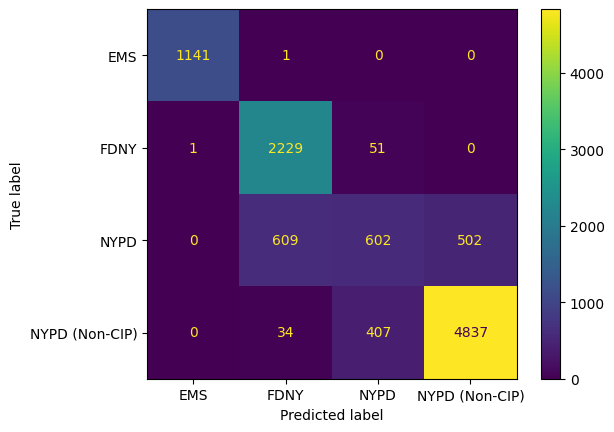

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(EMS[yvar], logreg.predict(X_scaled))

In [38]:
(logreg_cm[0,0] + logreg_cm[1,1])/logreg_cm.sum()

0.32360284232763586

### Precision 

In [39]:
from sklearn.metrics import precision_score

# Compute precision score for a multiclass target
precision = precision_score(EMS[yvar], logreg.predict(X_scaled), average='weighted')
print("Precision Score:", precision)

Precision Score: 0.8320809065912085


### Recall/Sensitivity

In [40]:
from sklearn.metrics import recall_score
recall_score(EMS[yvar], logreg.predict(X_scaled),average='weighted')
logreg_cm[1,1]/(logreg_cm[1,1] + logreg_cm[1,0])

0.9995515695067264

### F-Score

In [41]:
from sklearn.metrics import fbeta_score
fbeta_score(EMS[yvar], logreg.predict(X_scaled), average='weighted', beta = 1)

0.8322395866704668

In [42]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(EMS[yvar], logreg.predict(X_scaled))

(array([0.99912434, 0.77584407, 0.56792453, 0.9059749 ]),
 array([0.99912434, 0.97720298, 0.35143024, 0.91644562]),
 array([0.99912434, 0.86495925, 0.4341868 , 0.91118018]),
 array([1142, 2281, 1713, 5278]))

### Decision Trees

In [43]:
from sklearn.tree import DecisionTreeClassifier
small_tree_classifier = DecisionTreeClassifier(max_depth = 3).fit(X_scaled,EMS[yvar])

[Text(0.5, 0.875, 'ResponseTime <= -0.521\ngini = 0.656\nsamples = 10414\nvalue = [1142, 2281, 1713, 5278]'),
 Text(0.25, 0.625, 'NumberOfIncidents <= 0.728\ngini = 0.656\nsamples = 4717\nvalue = [1032, 2277, 1162, 246]'),
 Text(0.125, 0.375, 'NumberOfIncidents <= -0.761\ngini = 0.515\nsamples = 3686\nvalue = [2, 2276, 1162, 246]'),
 Text(0.0625, 0.125, 'gini = 0.278\nsamples = 1356\nvalue = [0, 1131, 4, 221]'),
 Text(0.1875, 0.125, 'gini = 0.511\nsamples = 2330\nvalue = [2, 1145, 1158, 25]'),
 Text(0.375, 0.375, 'NumberOfIncidents <= 0.758\ngini = 0.002\nsamples = 1031\nvalue = [1030, 1, 0, 0]'),
 Text(0.3125, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [2, 1, 0, 0]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 1028\nvalue = [1028, 0, 0, 0]'),
 Text(0.75, 0.625, 'ResponseTime <= -0.126\ngini = 0.21\nsamples = 5697\nvalue = [110, 4, 551, 5032]'),
 Text(0.625, 0.375, 'NumberOfIncidents <= 1.168\ngini = 0.524\nsamples = 1397\nvalue = [107, 4, 431, 855]'),
 Text(0.5625, 0.125, 'gini = 0.4

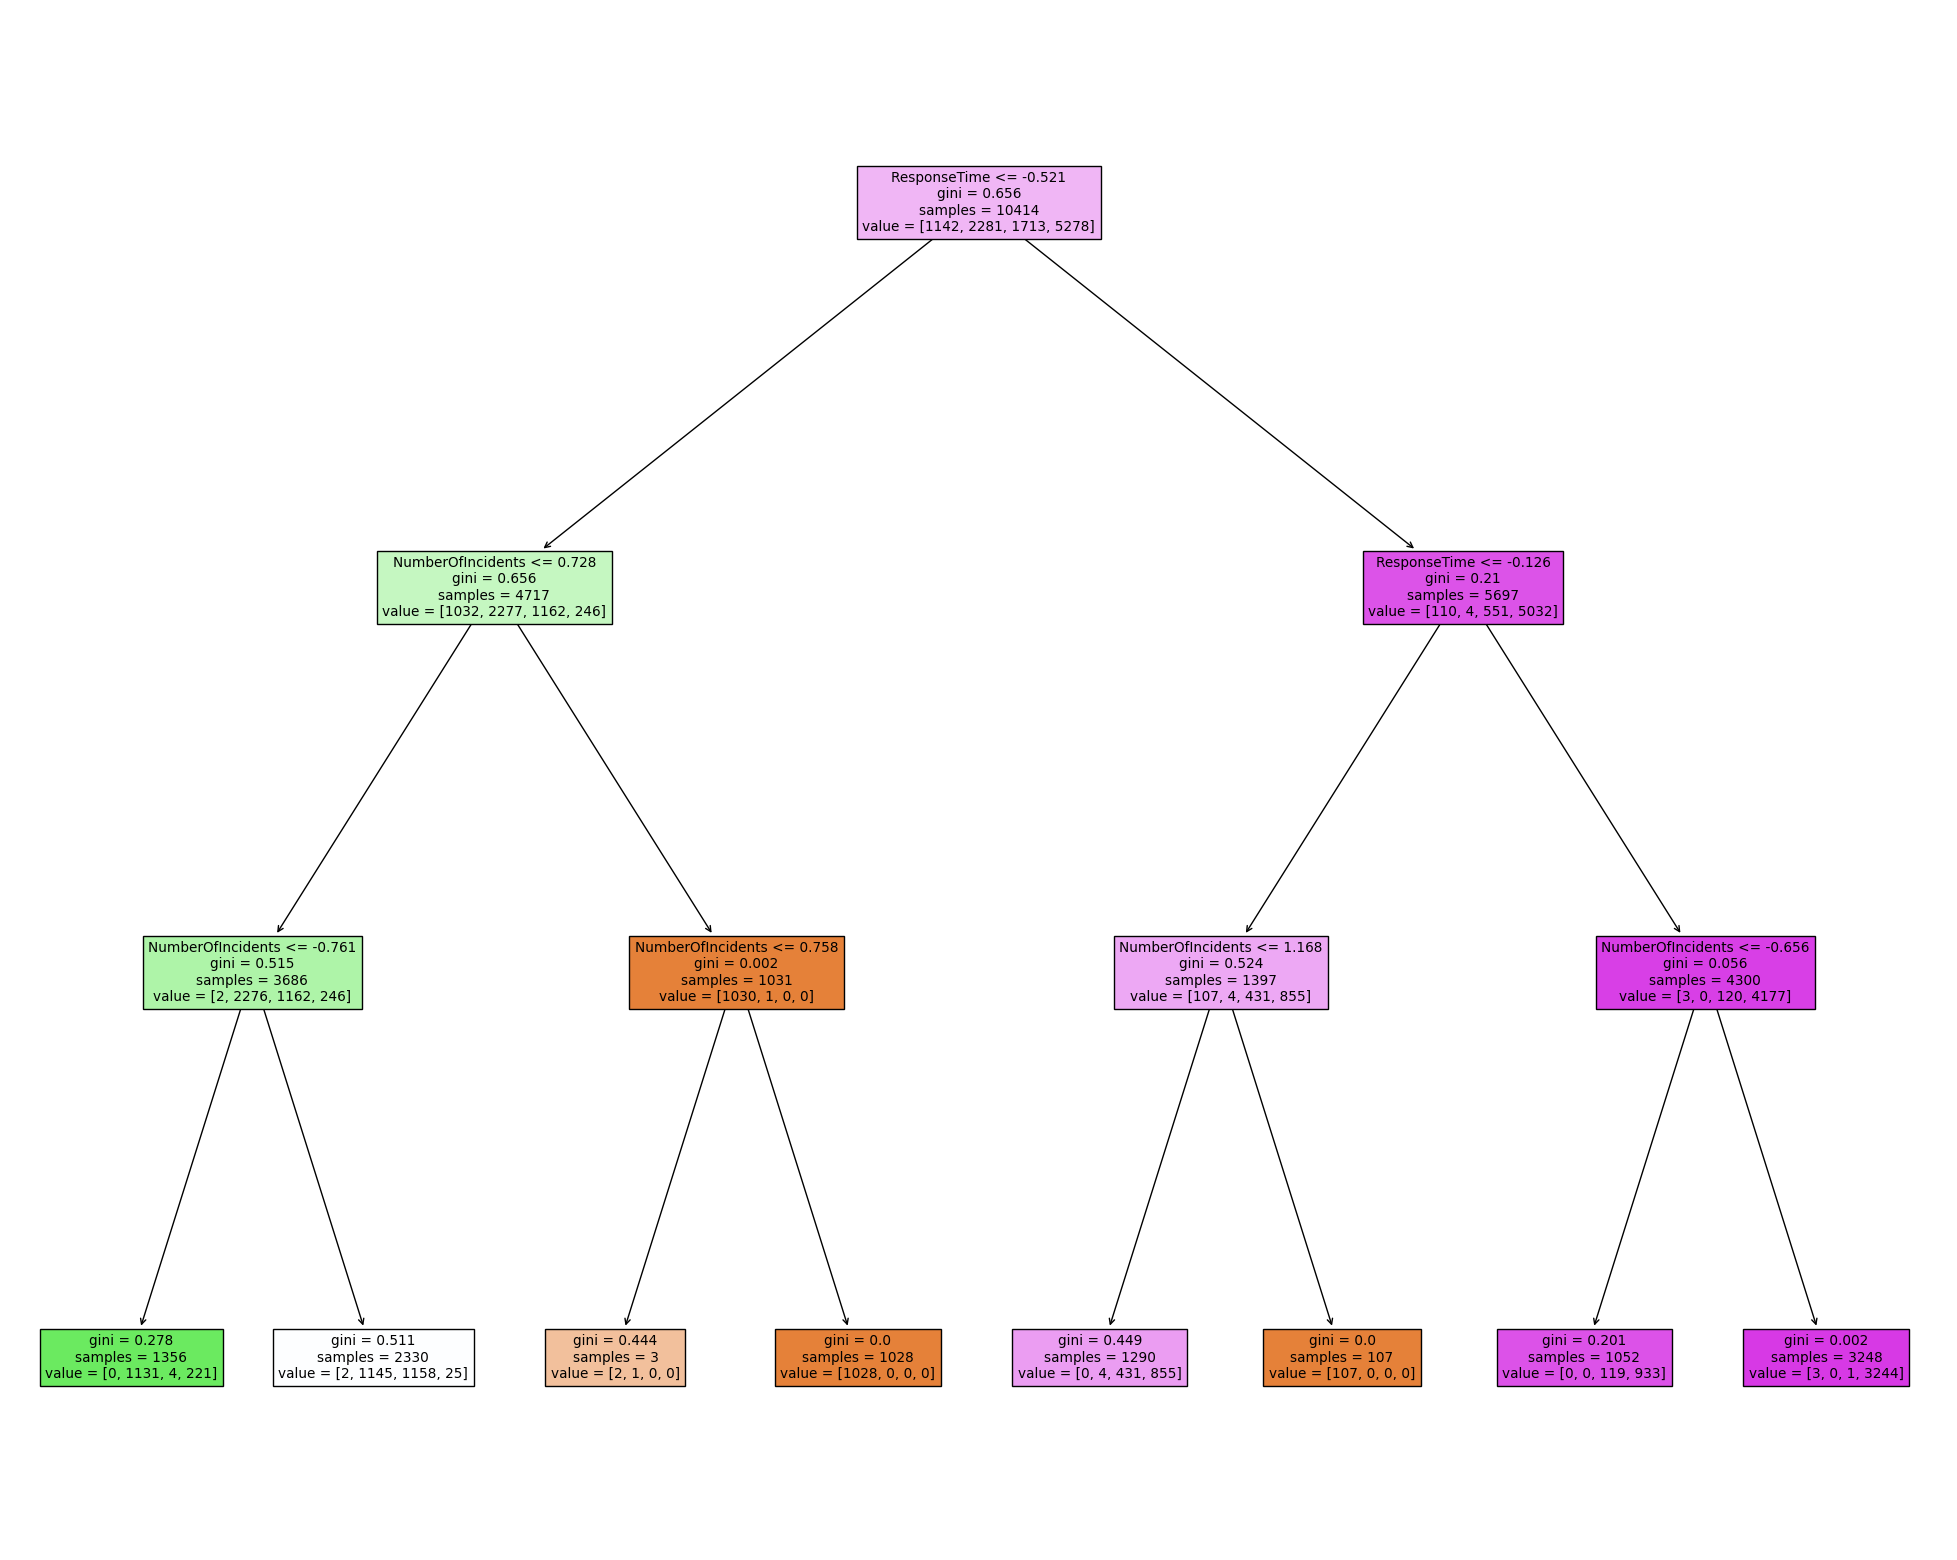

In [44]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
plot_tree(small_tree_classifier, feature_names = xvars, filled = True)

In [45]:
tree_classifier = DecisionTreeClassifier().fit(X_scaled, EMS[yvar]) 

In [46]:
tree_classifier.predict(X_scaled)

array(['EMS', 'EMS', 'FDNY', ..., 'NYPD (Non-CIP)', 'NYPD (Non-CIP)',
       'NYPD (Non-CIP)'], dtype=object)

In [47]:
tree_classifier.score(X_scaled, EMS[yvar])

0.9999039754177069

In [48]:
logreg.score(X_scaled, EMS[yvar])

0.8458805454196274

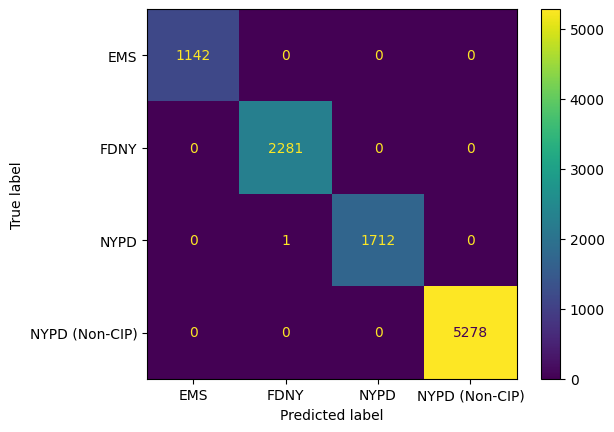

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(EMS[yvar], tree_classifier.predict(X_scaled))

### Using Trees to fit NumberOfIncidents

In [50]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor().fit(X_scaled,EMS["Number Of Incidents"])

Comparing the decision tree model to a linear regression model.

In [51]:
from sklearn.metrics import mean_squared_error
tree_reg_rmse = mean_squared_error(EMS["Number Of Incidents"], tree_reg.predict(X_scaled), squared = False)

from sklearn.linear_model import LinearRegression
ols_reg = LinearRegression().fit(X = X_scaled, y = EMS["Number Of Incidents"])
ols_reg_rmse = mean_squared_error(EMS["Number Of Incidents"], ols_reg.predict(X_scaled), squared = False)

print(f"Tree: {tree_reg_rmse:.2f}\nOLS: {ols_reg_rmse:.2f}\n")

Tree: 0.00
OLS: 0.00



### Random Forests

In [52]:
EMS.drop(columns = ["Incident Type"], inplace = True)
object_columns = EMS.select_dtypes("O").columns
EMS_randomforest = EMS.join([pd.get_dummies(EMS[cur_col], prefix = cur_col) for cur_col in object_columns])
EMS_randomforest.drop(columns = object_columns, inplace = True)

In [53]:
many_xvars = EMS.columns[EMS.columns != yvar]

In [54]:
from sklearn.ensemble import RandomForestClassifier
forest_classifier = RandomForestClassifier().fit(X = EMS_randomforest[many_xvars], y = EMS[yvar])

In [55]:
forest_classifier.score(EMS_randomforest[many_xvars], EMS[yvar])

1.0

In [56]:
from sklearn.model_selection import cross_val_score
num_folds = 5

In [57]:
forest_scores = cross_val_score(
    estimator = RandomForestClassifier(random_state = 872487),
    X = EMS_randomforest[many_xvars],
    y = EMS[yvar],
    cv = num_folds)
forest_scores.mean()

0.999711953912626

Comparing to only one tree.

In [58]:
tree_scores = cross_val_score(
    estimator = DecisionTreeClassifier(random_state = 872487),
    X = EMS_randomforest[many_xvars],
    y = EMS[yvar],
    cv = num_folds)
tree_scores.mean()

0.9981757081132979

### Random Forest for Regression

RandomForest works for regression problems as well, but you need to use the Regressor rather than the Classifier. And don't forget to use scoring = make_scorer(mean_squared_error,squared = False) so that you are comparing the RMSE instead of the default score coming out of cross_val_score.

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer

In [60]:
forest_regressor_scores = cross_val_score(
    estimator = RandomForestRegressor(),
    X = EMS[["Response Time", "Response Time"]],
    y = EMS["Number Of Incidents"],
    scoring = make_scorer(mean_squared_error,squared = False),
    cv = num_folds)
forest_regressor_scores.mean()

2066.7152839212463

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9da88ce2-3132-4783-8920-02df7d146f0c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>